In [ ]:
import pandas as pd
tasteSet = pd.read_csv("../data/TASTEset.csv")
tasteSet.head()

,ingredients,ingredients_entities
0,5 ounces rum\n4 ounces triple sec\n3 ounces Ti...,"[{""span"": ""[(0, 1), ]"", ""type"": ""QUANTITY"", ""e..."
1,"2 tubes cinnamon roll, refrigerated, with icin...","[{""span"": ""[(0, 1), ]"", ""type"": ""QUANTITY"", ""e..."
2,4 ripe coconuts\n1 cup evaporated milk\n1 cup ...,"[{""span"": ""[(0, 1), ]"", ""type"": ""QUANTITY"", ""e..."
3,1 sheet graham cracker (broken in half)\n2 pie...,"[{""span"": ""[(0, 1), ]"", ""type"": ""QUANTITY"", ""e..."
4,1 (8 ounce) package crescent rolls\n8 slices d...,"[{""span"": ""[(0, 1), ]"", ""type"": ""QUANTITY"", ""e..."


In [ ]:
import numpy as np

import json
tasteSet["ingredients_entities_json"] = tasteSet["ingredients_entities"].apply(json.loads)

all_entities_gs = []
recipe2entities = []
for elem in tasteSet["ingredients_entities_json"]:
  for ent in elem:
    all_entities_gs.append(tuple([ent["type"], ent["entity"]]))
  recipe2entities.append(len(elem))

entities_spans = pd.DataFrame(all_entities_gs, columns=["type", "entity"])
ss = entities_spans
tasteSet["ingredients_entities_json"]

0      [{'span': '[(0, 1), ]', 'type': 'QUANTITY', 'e...
1      [{'span': '[(0, 1), ]', 'type': 'QUANTITY', 'e...
2      [{'span': '[(0, 1), ]', 'type': 'QUANTITY', 'e...
3      [{'span': '[(0, 1), ]', 'type': 'QUANTITY', 'e...
4      [{'span': '[(0, 1), ]', 'type': 'QUANTITY', 'e...
                             ...                        
995    [{'span': '[(0, 1), ]', 'type': 'QUANTITY', 'e...
996    [{'span': '[(0, 2), ]', 'type': 'QUANTITY', 'e...
997    [{'span': '[(0, 2), ]', 'type': 'QUANTITY', 'e...
998    [{'span': '[(0, 1), ]', 'type': 'QUANTITY', 'e...
999    [{'span': '[(0, 1), ]', 'type': 'QUANTITY', 'e...
Name: ingredients_entities_json, Length: 1000, dtype: object

24588


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


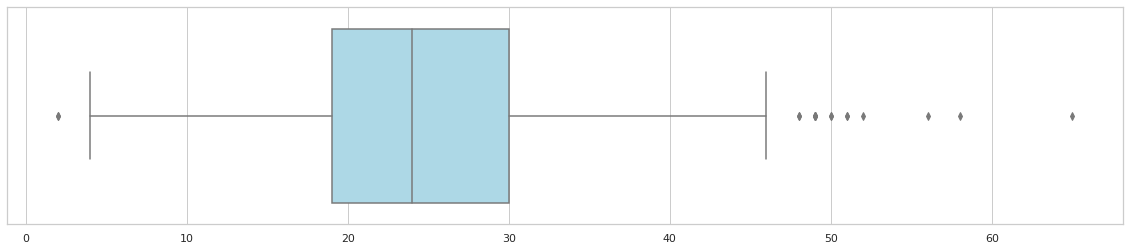

In [ ]:
#Entity tokens in recipes

recipe2len_entities = []
for elem in tasteSet["ingredients_entities_json"]:
  entity_tokens_recipe=0
  for ent in elem:
    tokens = ent["entity"].split(" ")
    #print(tokens)
    entity_tokens_recipe += len(tokens)
  recipe2len_entities.append(entity_tokens_recipe)

print(sum(recipe2len_entities))

import seaborn as sns
sns.set(rc={'figure.figsize':(20,4)})
sns.set_style("whitegrid")

sns.boxplot(recipe2len_entities,color="lightblue", saturation=1)

27136


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


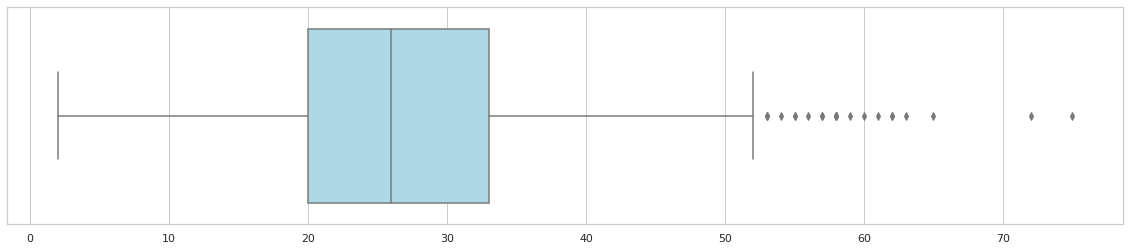

In [ ]:
#Tokens in recipes

tokens2recipe = []
for text in tasteSet['ingredients']:
  tokens = text.replace("\r\n"," ").replace("\n"," ").split(" ")
  tokens = [elem for elem in tokens if elem != ""]
  #print(tokens)
  tokens2recipe.append(len(tokens)) #len([elem for elem in tokens if elem != ""]))
print(sum(tokens2recipe))
sns.set(rc={'figure.figsize':(20,4)})
sns.set_style("whitegrid")
sns.boxplot(tokens2recipe,color="lightblue", saturation=1)

In [ ]:
# Coverage of text with entities [%]
sum(recipe2len_entities)/sum(tokens2recipe)*100

90.61025943396226

In [ ]:
ss

,type,entity
0,QUANTITY,5
1,UNIT,ounces
2,FOOD,rum
3,QUANTITY,4
4,UNIT,ounces
...,...,...
19452,UNIT,teaspoon
19453,FOOD,chili powder
19454,QUANTITY,1
19455,UNIT,teaspoon


In [ ]:
print("Number of all enitities: " + str( len(list(ss["entity"].tolist())) ))

print("Number of unique values of enitities: " + str( len(list(np.unique(ss["entity"].tolist()))) ) )

print("Number of types of entities: " + str( len(list(np.unique(ss["type"].tolist()))) ) )

print("Types of entities: " + str( list(np.unique(ss["type"].tolist())) ) )

ss = entities_spans

print("\nNumber of values by entity type")
for entity in list(np.unique(ss["type"].tolist())):
  print(entity, len(list(ss[ss["type"] == entity]["entity"].tolist())))

print("\nNumber of unique values by entity type")
for entity in list(np.unique(ss["type"].tolist())):
  print(entity, len(list(set(ss[ss["type"] == entity]["entity"].tolist()))))

print("\nAvg. number of entities per recipe")
for entity in list(np.unique(ss["type"].tolist())):
  print(entity, len(list(ss[ss["type"] == entity]["entity"].tolist()))/1000)

print("\nEach entity type contribution in the whole dataset")
for entity in list(np.unique(ss["type"].tolist())):
  print(entity, len(list(ss[ss["type"] == entity]["entity"].tolist()))/len(list(ss["entity"].tolist())) * 100)

Number of all enitities: 19457
Number of unique values of enitities: 2720
Number of types of entities: 15
Types of entities: ['COLOR', 'DIET', 'EXAMPLE', 'EXCLUDED', 'EXCLUSIVE', 'FOOD', 'PART', 'PHYSICAL_QUALITY', 'POSSIBLE_SUBSTITUTE', 'PROCESS', 'PURPOSE', 'QUANTITY', 'TASTE', 'TRADE_NAME', 'UNIT']

Number of values by entity type
COLOR 337
DIET 96
EXAMPLE 115
EXCLUDED 7
EXCLUSIVE 1
FOOD 5611
PART 92
PHYSICAL_QUALITY 1178
POSSIBLE_SUBSTITUTE 13
PROCESS 1532
PURPOSE 134
QUANTITY 5402
TASTE 187
TRADE_NAME 230
UNIT 4522

Number of unique values by entity type
COLOR 31
DIET 37
EXAMPLE 108
EXCLUDED 6
EXCLUSIVE 1
FOOD 1345
PART 28
PHYSICAL_QUALITY 270
POSSIBLE_SUBSTITUTE 13
PROCESS 324
PURPOSE 43
QUANTITY 273
TASTE 35
TRADE_NAME 193
UNIT 135

Avg. number of entities per recipe
COLOR 0.337
DIET 0.096
EXAMPLE 0.115
EXCLUDED 0.007
EXCLUSIVE 0.001
FOOD 5.611
PART 0.092
PHYSICAL_QUALITY 1.178
POSSIBLE_SUBSTITUTE 0.013
PROCESS 1.532
PURPOSE 0.134
QUANTITY 5.402
TASTE 0.187
TRADE_NAME 0.23
UNIT 

In [ ]:
#Number of discontinuous entities

all_disc_entities_spans = []
discontinuous = 0
c = '('

for elem in tasteSet["ingredients_entities_json"]:
  for ent in elem:
    spans = ent["span"] # string
    tmp = [pos for pos, char in enumerate(spans) if char == c]
    if len(tmp) > 1:
      discontinuous += 1
      all_disc_entities_spans.append(ent["entity"])
    
print("Number of discontinuous entities: " + str( discontinuous ) )
print("Percent of discontinuous entities: " + str( discontinuous/len(list(ss["entity"].tolist()))*100 ) )
all_disc_entities_spans

Number of discontinuous entities: 107
Percent of discontinuous entities: 0.5499306162306624


['cinnamon roll with icing',
 'vine tomatoes',
 'simple syrup one part sugar, one part water',
 'pudding chocolate',
 'chopped finely',
 'cheese Gouda',
 'seasoning onion soup',
 '1 or more',
 'cream Irish',
 'melon liqueur Midori',
 'chocolate chips milk chocolate',
 'chocolate Milk',
 'jalapeno from jarred jalapenos',
 'butter nut',
 'green tea first 2 juices of the day',
 'baking mix bisquick',
 'raspberries sliced mango kiwifruit bananas',
 'bananas frozen',
 'almond bark',
 'chocolate drink mix',
 '4 approximately',
 'strawberry gelatin dessert',
 'pepperoncini peppers with liquid',
 'pancake mix fat free',
 'broth from cooked pork roast',
 "decorator's icing",
 'chili pepper jalapeno',
 'round tip steak lean beef',
 'all purpose flour maida',
 '2 1/4 approximately',
 'challah loaf',
 'spring onions /scallions',
 'cinnamon roll dough with icing',
 'cheese grano padano',
 '8 -9 depending on size',
 'seltzer Original',
 'rice instant',
 "confectioners' sugar icing",
 'grated freshly

In [ ]:
print("Average length of enititie in type")

for entity in list(np.unique(ss["type"].tolist())):
  temp = [len(list(elem.replace(" ", "-").split("-"))) for elem in ss[ss["type"] == entity]["entity"]]
  print(entity+": "+ str(sum(temp)/len(temp)))

Average length of enititie in type
COLOR: 1.0267062314540059
DIET: 1.6666666666666667
EXAMPLE: 2.0521739130434784
EXCLUDED: 1.5714285714285714
EXCLUSIVE: 1.0
FOOD: 1.531099625735163
PART: 1.108695652173913
PHYSICAL_QUALITY: 1.2572156196943973
POSSIBLE_SUBSTITUTE: 2.3846153846153846
PROCESS: 1.4634464751958225
PURPOSE: 2.2238805970149254
QUANTITY: 1.140503517215846
TASTE: 1.1443850267379678
TRADE_NAME: 2.0521739130434784
UNIT: 1.0079610791685094


In [ ]:
#Number of ingredient in all the recipes
#print(tasteSet['ingredients'][0])

ingredients2recipe = []
for ingredient in tasteSet['ingredients']:
  #print(ingredient.split("\n"))
  ingredients2recipe.append((len([elem for elem in ingredient.split("\n") if elem != ""])))
print(sum(ingredients2recipe))

5374


In [ ]:
#The most frequent values of each entity type

from collections import Counter
for entity in list(np.unique(ss["type"].tolist())):
  entities_list = Counter(ss[ss["type"] == entity]["entity"].tolist())

  entt = [e for e in list(zip(dict(entities_list).keys(), dict(entities_list).values()))]
  entt.sort(key=lambda tup: tup[1], reverse=True)
  print(entity, entt[:5])

COLOR [('white', 63), ('black', 61), ('brown', 47), ('green', 47), ('red', 44)]
DIET [('low-fat', 11), ('light', 10), ('dairy-free', 8), ('organic', 7), ('fat-free', 6)]
EXAMPLE [('blueberries', 3), ('Triple Sec', 2), ('whole wheat', 2), ('strawberry', 2), ('cheddar', 2)]
EXCLUDED [('margarine', 2), ('evaporated milk', 1), ('rice instant', 1), ('instant', 1), ('the orange yams', 1)]
EXCLUSIVE [('butter', 1)]
FOOD [('salt', 215), ('sugar', 206), ('butter', 192), ('pepper', 167), ('milk', 144)]
PART [('breasts', 23), ('whites', 13), ('breast', 10), ('thighs', 8), ('yolks', 6)]
PHYSICAL_QUALITY [('fresh', 149), ('large', 99), ('frozen', 58), ('medium', 53), ('dried', 51)]
POSSIBLE_SUBSTITUTE [('other cheese', 1), ('milk', 1), ('green tea first 2 juices of the day', 1), ('half bread flour', 1), ('soy parmesan', 1)]
PROCESS [('chopped', 156), ('shredded', 84), ('ground', 76), ('grated', 70), ('sliced', 66)]
PURPOSE [('for garnish', 22), ('to taste', 21), ('for serving', 10), ('to serve', 8)

41
2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


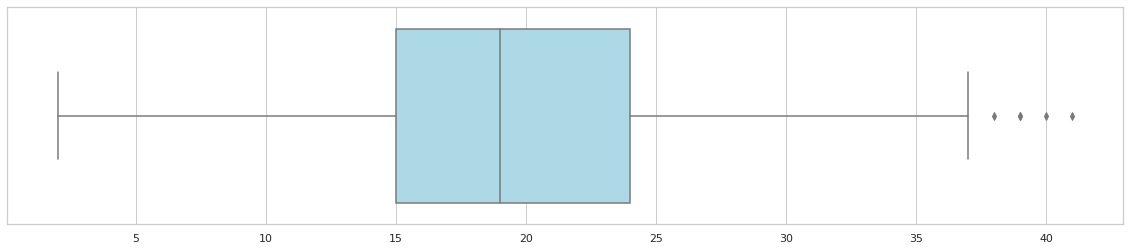

In [ ]:
# Number of gold-standard entities in recipes
print(np.max(recipe2entities))
print(np.min(recipe2entities))

import seaborn as sns
sns.set(rc={'figure.figsize':(20,4)})
sns.set_style("whitegrid")

sns.boxplot(recipe2entities,color="lightblue", saturation=1)

75
2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


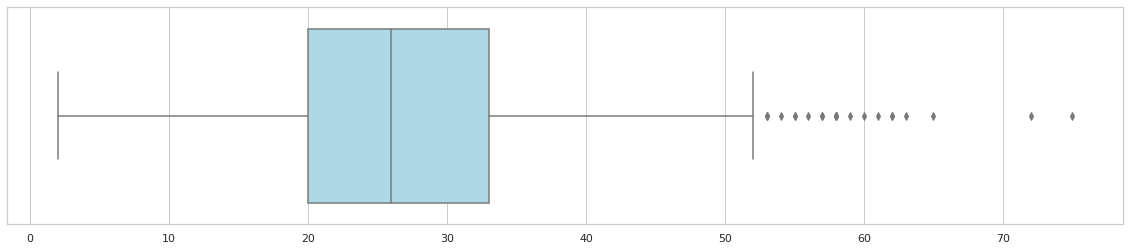

In [ ]:
# Tokens/words in recipes
print(np.max(tokens2recipe))
print(np.min(tokens2recipe))

sns.set(rc={'figure.figsize':(20,4)})
sns.set_style("whitegrid")
sns.boxplot(tokens2recipe,color="lightblue", saturation=1)

In [ ]:
import seaborn as sns
from collections import  Counter
import spacy
import matplotlib.pyplot as plt
!conda install -c conda-forge spacy
!python -m spacy download en_core_web_sm
nlp = spacy.load("en_core_web_sm")

/bin/bash: conda: command not found
     |████████████████████████████████| 12.0 MB 8.6 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


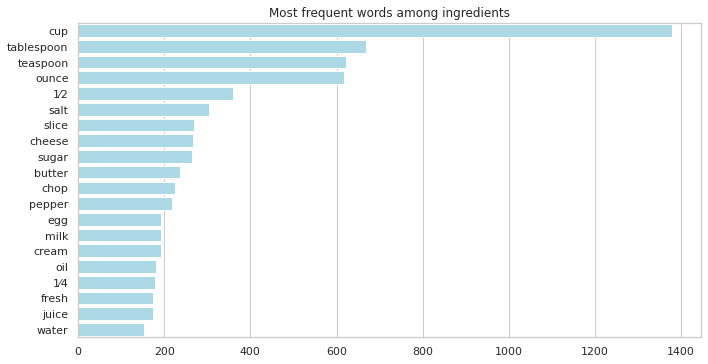

In [ ]:
# Most frequent words among ingredients

sns.set(rc={'figure.figsize':(10,5)})
sns.set_style("whitegrid")

def plot_top_non_stopwords_barchart(text,title):
    
    corpus=[token.lemma_ for doc in nlp.pipe(text) for token in doc if not token.is_stop and not token.is_digit and not token.is_punct and "/" not in token.lemma_  and " " not in token.lemma_ and "\n" not in token.lemma_] #and '1⁄2' not in token.lemma_ and '1⁄4' not in token.lemma_ and '½' not in token.lemma_]
    #print(corpus)
    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:20]:
      x.append(word)
      y.append(count)     
    sns.barplot(x=y,y=x,color="lightblue", saturation=1)
    plt.tight_layout()
    plt.title("Most frequent words among "+title)
    plt.show()

text = tasteSet["ingredients"]
plot_top_non_stopwords_barchart(text,"ingredients")

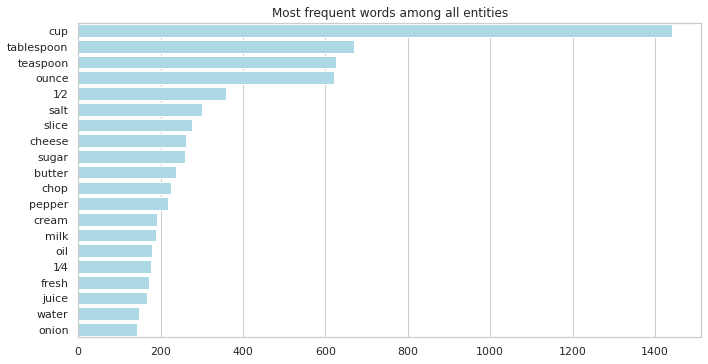

In [ ]:
plot_top_non_stopwords_barchart(ss["entity"],"all entities")

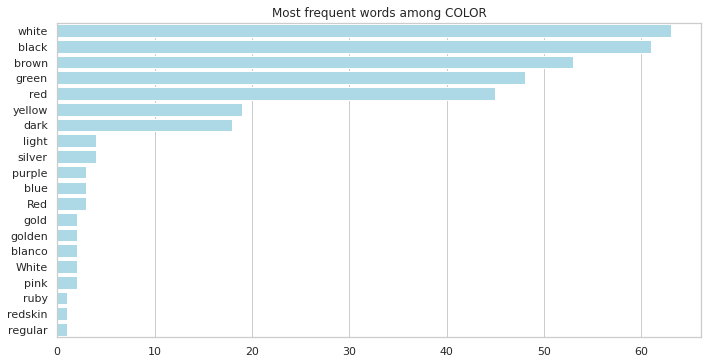

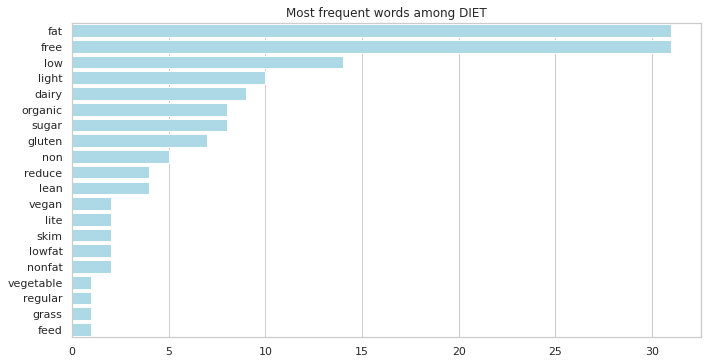

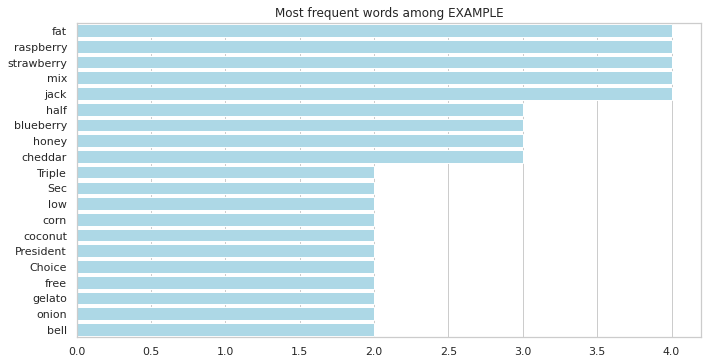

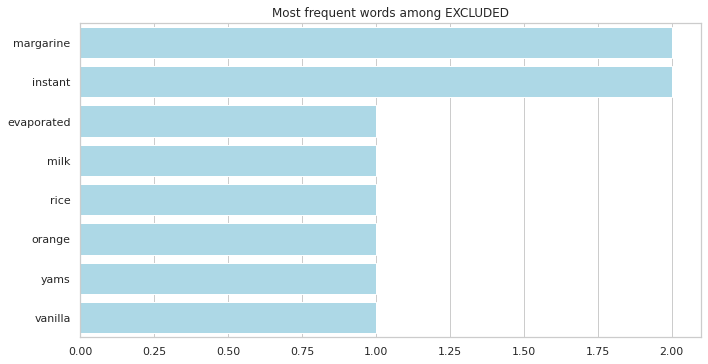

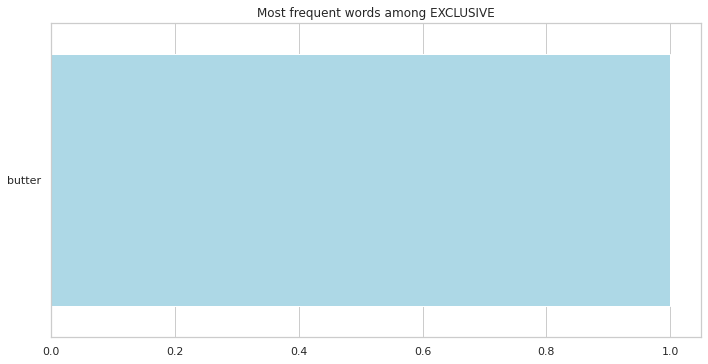

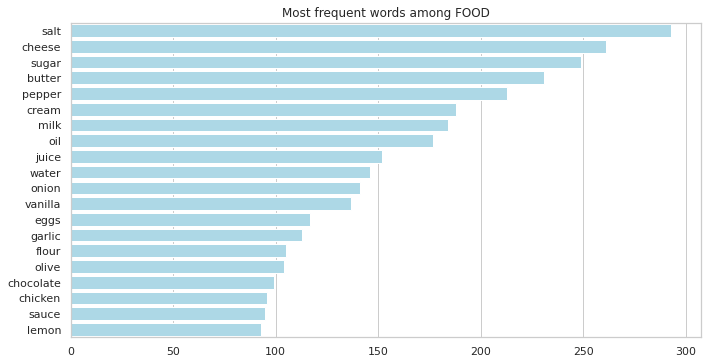

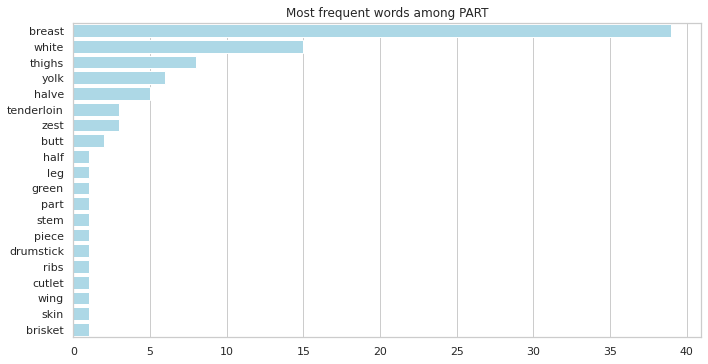

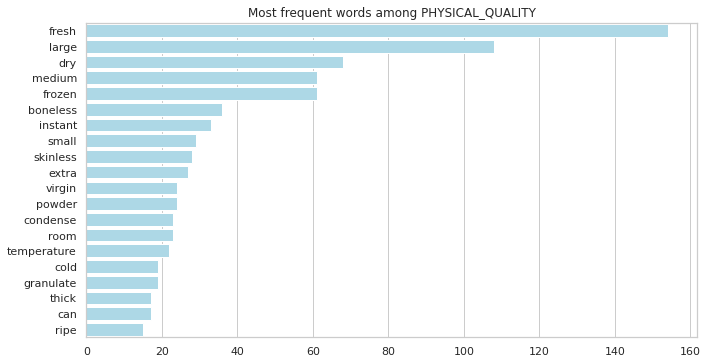

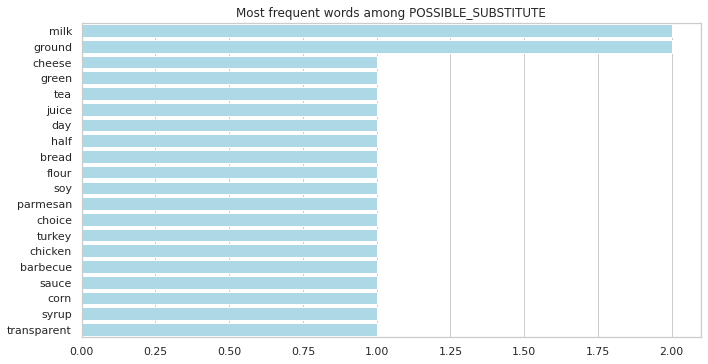

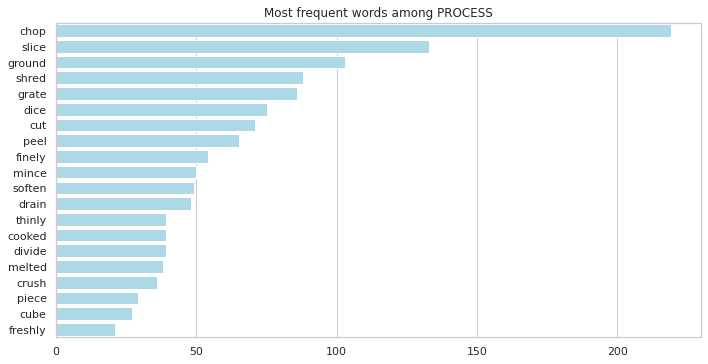

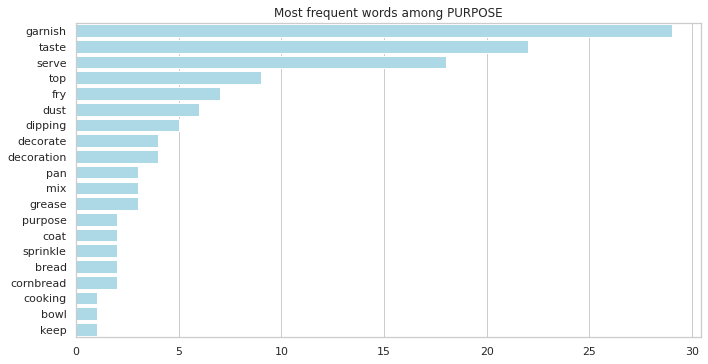

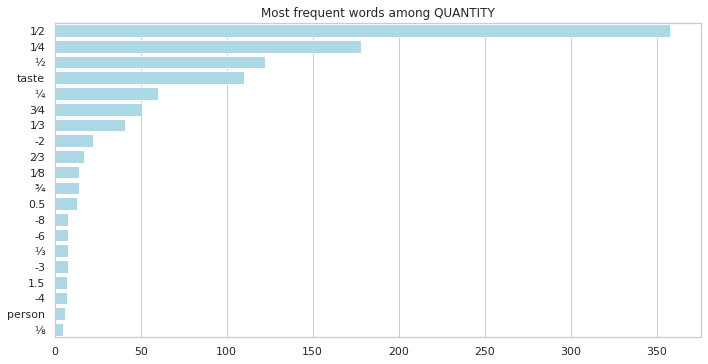

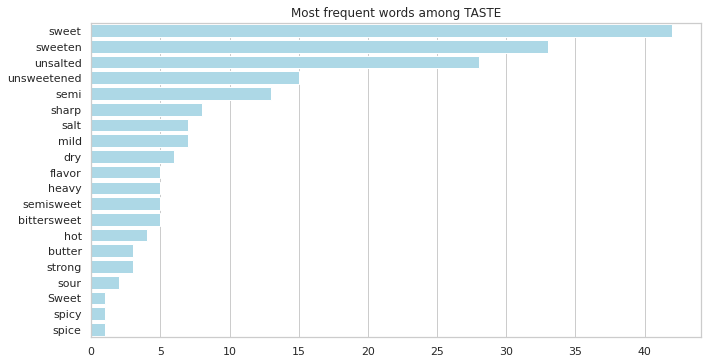

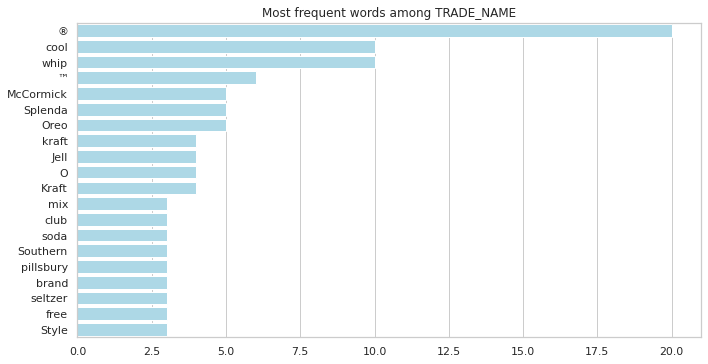

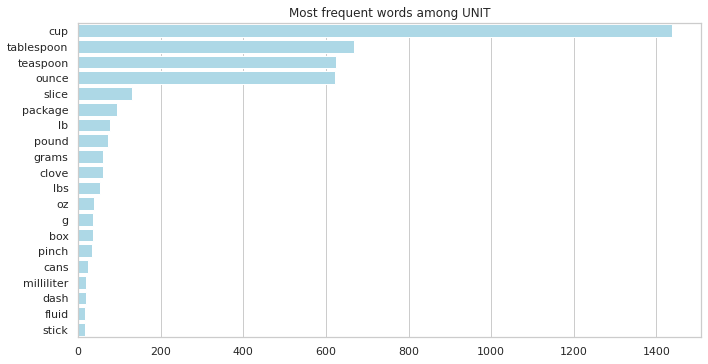

In [ ]:
from collections import Counter
for entity in list(np.unique(ss["type"].tolist())):
  text = ss[ss["type"] == entity]["entity"]
  plot_top_non_stopwords_barchart(text,entity)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


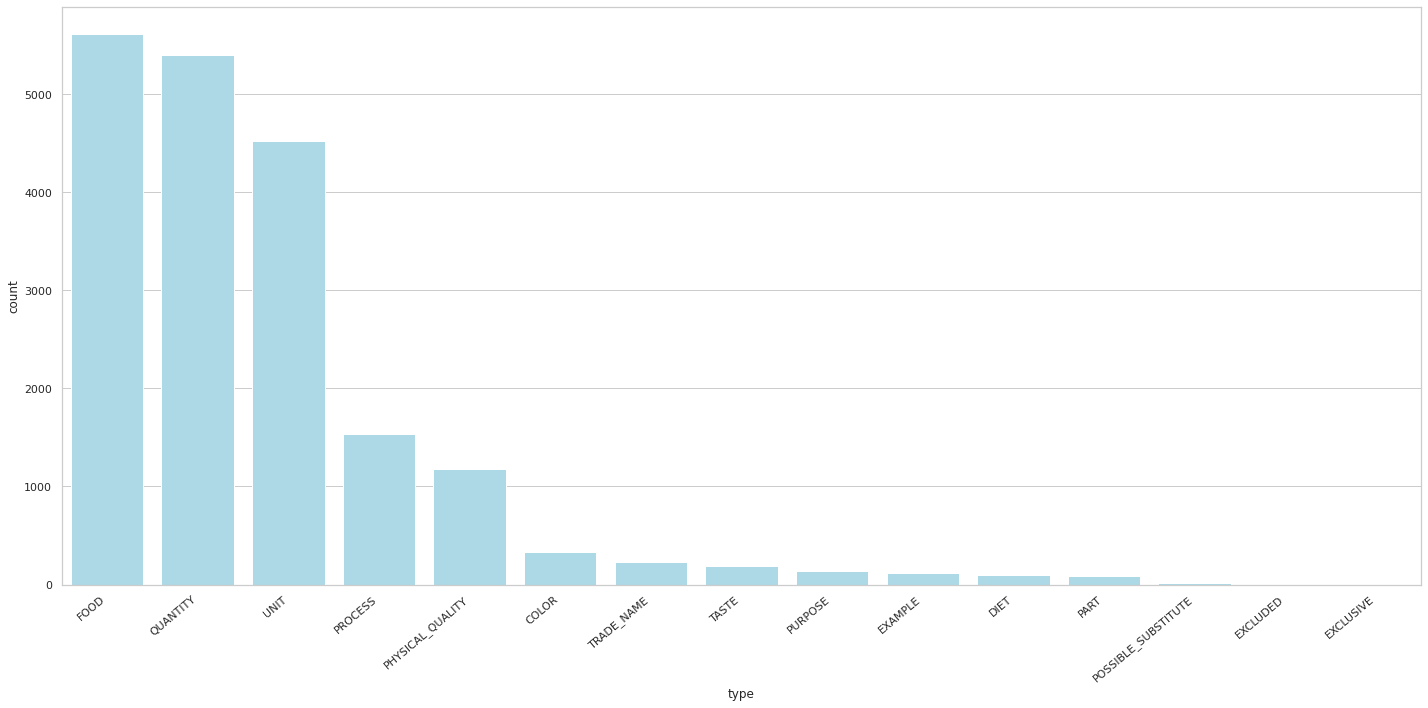

In [ ]:
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(20,10)})
sns.set_style("whitegrid")

ax = sns.countplot(ss["type"], order=[el[0] for el in pd.DataFrame(ss["type"]).value_counts().index],
                   color="lightblue", saturation=1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
#plt.title(f"Histogram of {entity}")
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:20]

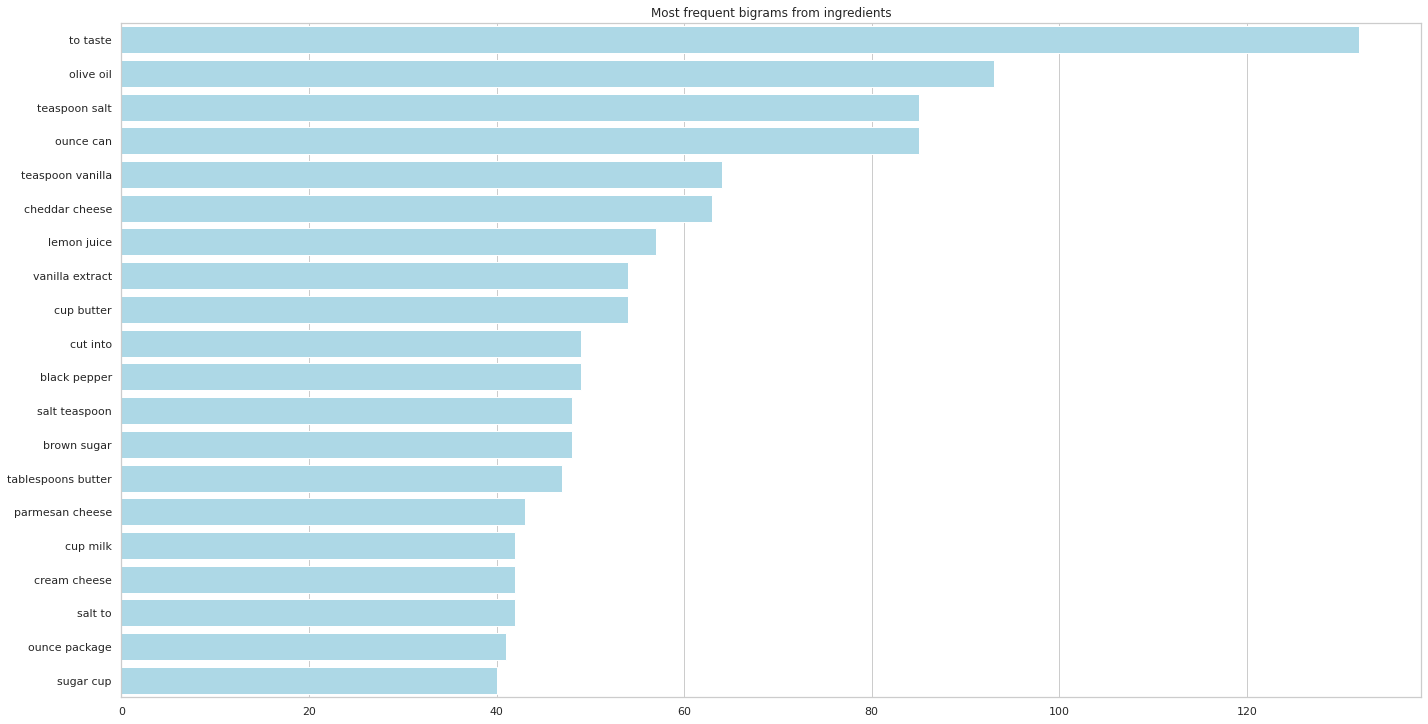

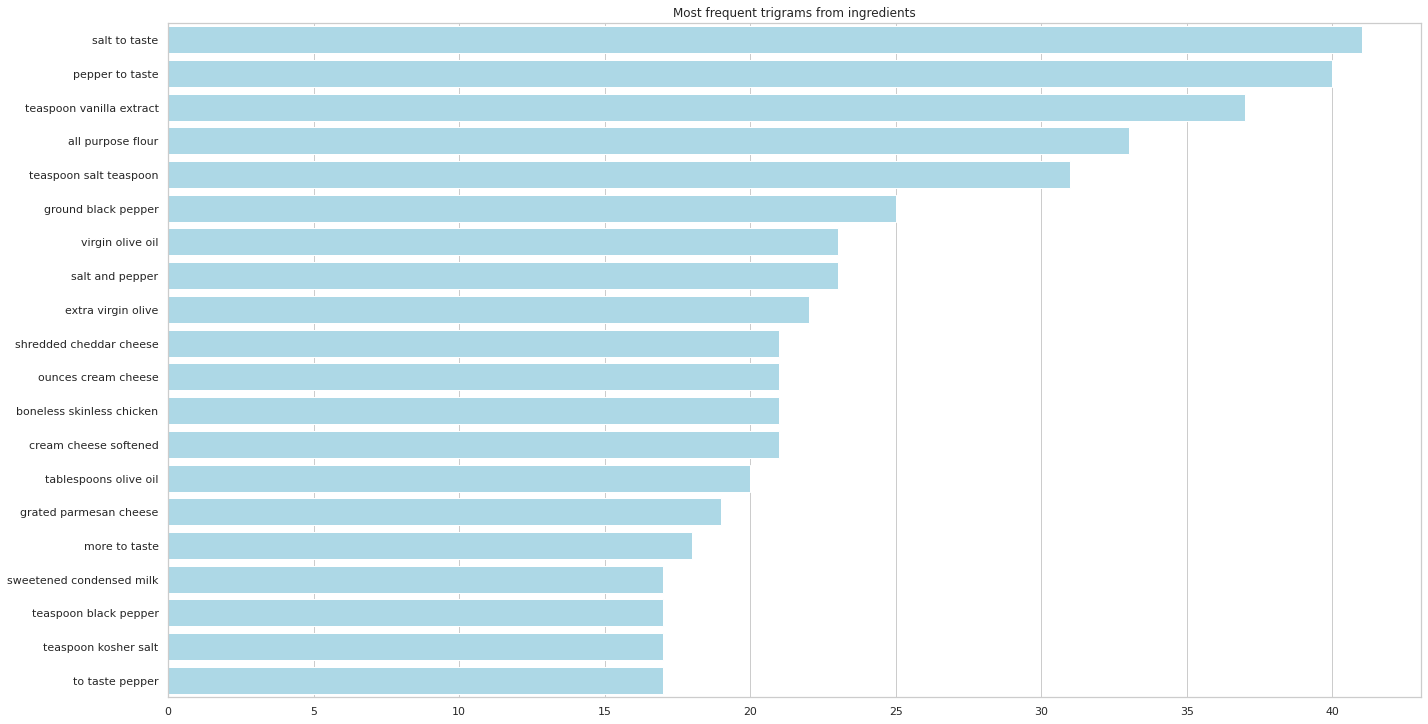

In [ ]:
top_tri_grams=get_top_ngram(tasteSet["ingredients"],n=2) #tasteSet["ingredients"].apply(" ".join),n=2
x,y=map(list,zip(*top_tri_grams))
sns.barplot(x=y,y=x,color="lightblue", saturation=1)
plt.tight_layout()
plt.title("Most frequent bigrams from ingredients")
plt.show()

top_tri_grams=get_top_ngram(tasteSet["ingredients"],n=3) 
x,y=map(list,zip(*top_tri_grams))
sns.barplot(x=y,y=x,color="lightblue", saturation=1)
plt.tight_layout()
plt.title("Most frequent trigrams from ingredients")
plt.show()

In [ ]:
# Percentile of entity lengths
for percentil in range(80, 100, 1):
  print(f'percentile {percentil}: {np.percentile([len(elem.split(" ")) for elem in ss["entity"] if len(elem.split(" ")) > 0], percentil)}')

percentile 80: 1.0
percentile 81: 2.0
percentile 82: 2.0
percentile 83: 2.0
percentile 84: 2.0
percentile 85: 2.0
percentile 86: 2.0
percentile 87: 2.0
percentile 88: 2.0
percentile 89: 2.0
percentile 90: 2.0
percentile 91: 2.0
percentile 92: 2.0
percentile 93: 2.0
percentile 94: 2.0
percentile 95: 2.0
percentile 96: 2.7599999999983993
percentile 97: 3.0
percentile 98: 3.0
percentile 99: 4.0


In [ ]:
# the same entities with different types, depending on a recipe context
all_combinations = []
all_entities = ["FOOD", "UNIT", "PROCESS", "PHYSICAL_QUALITY", "PART", "TASTE", "PURPOSE", "COLOR"]
for entity in all_entities:
  temp_entities = ss[ss["type"] == entity]["entity"].tolist()
  for entity2 in all_entities:
    if entity2 == entity:
      continue
    temp_entities2 = ss[ss["type"] == entity2]["entity"].tolist()
    for temp_entity in temp_entities:
      if temp_entity in temp_entities2:
        all_combinations.append(f"{temp_entity}_{entity}_{entity2}")
        #print(temp_entity, entity, entity2)
print(len(list(all_combinations)))
print(len(list(np.unique(all_combinations))))
#print(np.unique(all_combinations))

971
116


In [ ]:
for idx, elem in enumerate(list(np.unique(all_combinations))):
  if idx % 2 == 0:
    continue
  print(elem)

Crushed_PROCESS_PHYSICAL_QUALITY
Fresh_PROCESS_PHYSICAL_QUALITY
all purpose_PURPOSE_FOOD
aluminum foil_PHYSICAL_QUALITY_FOOD
bars_UNIT_PHYSICAL_QUALITY
bean_UNIT_FOOD
boiling_PROCESS_PHYSICAL_QUALITY
brewed_PROCESS_PHYSICAL_QUALITY
canned_UNIT_PHYSICAL_QUALITY
chilled_PROCESS_PHYSICAL_QUALITY
cloves_UNIT_FOOD
cooked_PROCESS_PHYSICAL_QUALITY
crushed_PROCESS_PHYSICAL_QUALITY
cube_UNIT_PHYSICAL_QUALITY
cubes_UNIT_PHYSICAL_QUALITY
diced_PROCESS_PHYSICAL_QUALITY
dried_PROCESS_PHYSICAL_QUALITY
dry_TASTE_PHYSICAL_QUALITY
egg noodles_PHYSICAL_QUALITY_FOOD
fillets_UNIT_FOOD
filtered_PROCESS_PHYSICAL_QUALITY
flaked_PROCESS_PHYSICAL_QUALITY
freeze-dried_PROCESS_PHYSICAL_QUALITY
fresh squeezed_PROCESS_PHYSICAL_QUALITY
frozen_PROCESS_PHYSICAL_QUALITY
garlic_TASTE_FOOD
halves_UNIT_PROCESS
heavy_TASTE_PHYSICAL_QUALITY
hot_TASTE_PHYSICAL_QUALITY
juice_PART_FOOD
light_PHYSICAL_QUALITY_COLOR
minced_PROCESS_PHYSICAL_QUALITY
mixed vegetables_PHYSICAL_QUALITY_FOOD
mixed_PHYSICAL_QUALITY_COLOR
no-salt-added

In [ ]:
#Examples
example_entity = "fresh squeezed"
tasteSet[tasteSet["ingredients"].str.contains(example_entity)]["ingredients"].tolist()[0].split("\n"), tasteSet[tasteSet["ingredients"].str.contains(example_entity)]["ingredients"].tolist()[1].split("\n")

(['4 sugar cubes',
  '4 drops Angostura bitters',
  '1 (25 ounce) bottle champagne, very cold',
  '4 teaspoons cognac or 4 teaspoons brandy',
  '4 teaspoons fresh squeezed orange juice',
  '4 orange slices',
  '4 maraschino cherries',
  ''],
 ['2 quarts strawberries (perfectly ripened)',
  '1.75 ounces Sure Jell Premium Fruit Pectin (100% Natural)',
  '1 tablespoon lemon juice (fresh squeezed)',
  '7 cups organic cane sugar',
  '72 ounces jelly (Ball canning, jars with lids and rings)',
  'boiling water (A large pot of)',
  ''])